<a href="https://colab.research.google.com/github/xcellentbird/playground/blob/main/newton_raphson_for_root.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

뉴턴-랩슨 방법을 이용한 n제곱근 계산 알고리즘 구현 및 테스트

참고:
- https://darkpgmr.tistory.com/58
- https://en.wikipedia.org/wiki/Nth_root#Using_Newton's_method

In [37]:
class NewtonRaphsonRoot:
    """
    뉴턴-랩슨 방법을 사용하여 n 제곱근을 계산하는 클래스
    f(x) = x^n - base = 0 을 만족하는 근사값 x를 찾는다.
    """
    def __init__(self, tol=0.0001):
        self.tol = tol

        self.i = -1
        self._estimate_history = []

    def is_converged(self, prev_x, new_x):
        """
        x의 수렴 여부를 확인한다.
        """
        return abs(new_x - prev_x) <= self.tol

    def newton_update(self, base, n, x):
        """
        뉴턴-랩슨 방법의 재귀 관계식.

        f(x) = x^n - base = 0
        f'(x) = n * x^(n-1)
        x_k+1 = x_k - f(x_k) / f'(x_k)
        """
        return ((n-1) * x + base / x ** (n-1)) / n

    def estimate(self, base, n, x):
        """
        뉴턴-랩슨 방법의 재귀 관계식을 사용하여 근사값 x를 찾는다.
        """
        self.i += 1

        new_x = self.newton_update(base, n, x)
        self._estimate_history.append(new_x)
        print(f"Update x{self.i-1} to x{self.i} | {x} -> {new_x}")

        if self.is_converged(x, new_x):
            print(f"Converged | x≈{x}, iter={self.i}, Δ={abs(new_x - x)}")
            return x

        else:
            return self.estimate(base, n, new_x)

    def compute_nth_root(self, base: float, n: int, init_x: float) -> float:
        """
        n 제곱근을 계산한다.

        Args:
            base: float
                원래 값
            n: int
                제곱근의 지수
            init_x: float
                초기 x 값

        Returns:
            float
                근사값 x
        """
        self._i = 0
        self._estimate_history = [init_x]

        return self.estimate(base, n, init_x)


In [38]:
import time


BASE = 5
N_ROOT = 3
INIT_X = 20

TOL = 0.000001


newton_raphson = NewtonRaphsonRoot(tol=TOL)

start = time.time()
my_result = newton_raphson.compute_nth_root(BASE, N_ROOT, INIT_X)
elapsed = time.time() - start

print(f"result: {my_result}, elapsed: {elapsed :.10f}")

Update x-1 to x0 | 20 -> 13.3375
Update x0 to x1 | 13.3375 -> 8.901035810037106
Update x1 to x2 | 8.901035810037106 -> 5.955060090888019
Update x2 to x3 | 5.955060090888019 -> 4.017037744200842
Update x3 to x4 | 4.017037744200842 -> 2.7813100845517176
Update x4 to x5 | 2.7813100845517176 -> 2.0696584247556813
Update x5 to x6 | 2.0696584247556813 -> 1.7688634739783673
Update x6 to x7 | 1.7688634739783673 -> 1.7119146260660199
Update x7 to x8 | 1.7119146260660199 -> 1.7099781413299457
Update x8 to x9 | 1.7099781413299457 -> 1.7099759466795137
Update x9 to x10 | 1.7099759466795137 -> 1.709975946676697
Converged | x≈1.7099759466795137, iter=10, Δ=2.816635813474022e-12
result: 1.7099759466795137, elapsed: 0.0011057854


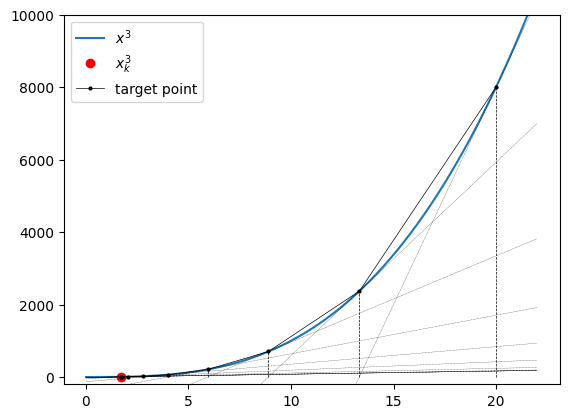

In [39]:
from matplotlib import pyplot as plt
import numpy as np


# draw guide line
xs = np.linspace(0.01, 22, 1000)
ys = [np.power(x, N_ROOT) for x in xs]
plt.plot(xs, ys)

# target point
target_x = np.power(BASE, 1/N_ROOT)
target_y = BASE
plt.plot(target_x, target_y, 'ro')

# draw history points
x_history = newton_raphson._estimate_history
y_history = [np.power(x, N_ROOT) for x in x_history]
plt.plot(x_history, y_history, 'ko-', markersize=2, linewidth=0.5)

# draw tangent line at (x_history, y_history)
# draw vertical line at (x_history, 0)
for i in range(len(x_history)):
    x_i = x_history[i]
    y_i = y_history[i]
    w = np.power(x_i, N_ROOT - 1) * N_ROOT
    line_ys = [y_i + (x - x_i) * w for x in xs]
    plt.plot(xs, line_ys, 'k--', linewidth=0.2)
    plt.plot([x_i, x_i], [0, y_i], 'k--', linewidth=0.5)

plt.legend([f'$x^{N_ROOT}$', f'$x_k^{N_ROOT}$', f'target point'])
plt.ylim(-200, 10000)

plt.show()

In [50]:
import math

print(f"my | result: {my_result}, elapsed: {elapsed :.10f}")

start = time.time()
np_result = np.power(BASE, 1/2)
np_elapsed = time.time() - start

print(f"numpy | result: {np_result}, elapsed: {np_elapsed :.10f}")

start = time.time()
math_result = math.pow(BASE, 1/2)
math_elapsed = time.time() - start

print(f"math | result: {math_result}, elapsed: {math_elapsed :.10f}")

start = time.time()
base_result = BASE ** (1/2)
base_elapsed = time.time() - start

print(f"base | result: {base_result}, elapsed: {base_elapsed :.10f}")

my | result: 1.7099759466795137, elapsed: 0.0011057854
numpy | result: 2.23606797749979, elapsed: 0.0001349449
math | result: 2.23606797749979, elapsed: 0.0000622272
base | result: 2.23606797749979, elapsed: 0.0001142025


In [41]:
abs(my_result - base_result)

2.816857858078947e-12

# Review
- 수렴 허용오차(tol)를 적게 설정해서 정확도를 높일 수록, 역시 x가 더 많이 업데이트된다.
- 또한 초기 설정값(init_x)에 업데이트 횟수가 달라진다.
- 제곱근을 구할 때는 `**`, `math.pow`, `numpy.power` 순으로 빠르다. 또한, 초기값이 매번 다르게 설정해서 그런지, 실행할 때마다 계산 시간이 다르다. FastInvSqrt 알고리즘이 적용되어있는지 확인하기 위해 `N_ROOT`를 2로 바꿔보아도 계산 속도가 크게 달라지지 않는다.

더 훝어보기
- Fast InvSqrt: https://ko.wikipedia.org/wiki/%EA%B3%A0%EC%86%8D_%EC%97%AD_%EC%A0%9C%EA%B3%B1%EA%B7%BC
    - 1/sqrt(x)를 계산하는 알고리즘
    - 뉴턴-랩슨 1 iter만 돌아서 작동한다고 한다.